<a href="https://colab.research.google.com/github/cmunozcortes/c247-final-project/blob/baseline-chris/src/CNN_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shallow CNN for EEG Decoding
The goals for this notebook are:
* Do some exploration on the dataset
* Build the shallow CNN described on Schirrmeister et al.

## Data Exploration
Take a look at the dataset and understand the data.

First let's import tf/keras and all the packages needed.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers

In [2]:
print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.0


Load dataset and check dimensions.

In [3]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
os.chdir("/content/drive/MyDrive/c247/data")

X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")
person_train_valid = np.load("person_train_valid.npy")
X_train_valid = np.load("X_train_valid.npy")
y_train_valid = np.load("y_train_valid.npy")
person_test = np.load("person_test.npy")

In [5]:
print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))

Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


### Training/test data
There are 2115 trials on the training data and 443 trials on the test data; each trial has data from 22 electrodes over 1000 time bins.

Plot the data for some of the trials and electrodes (channels).


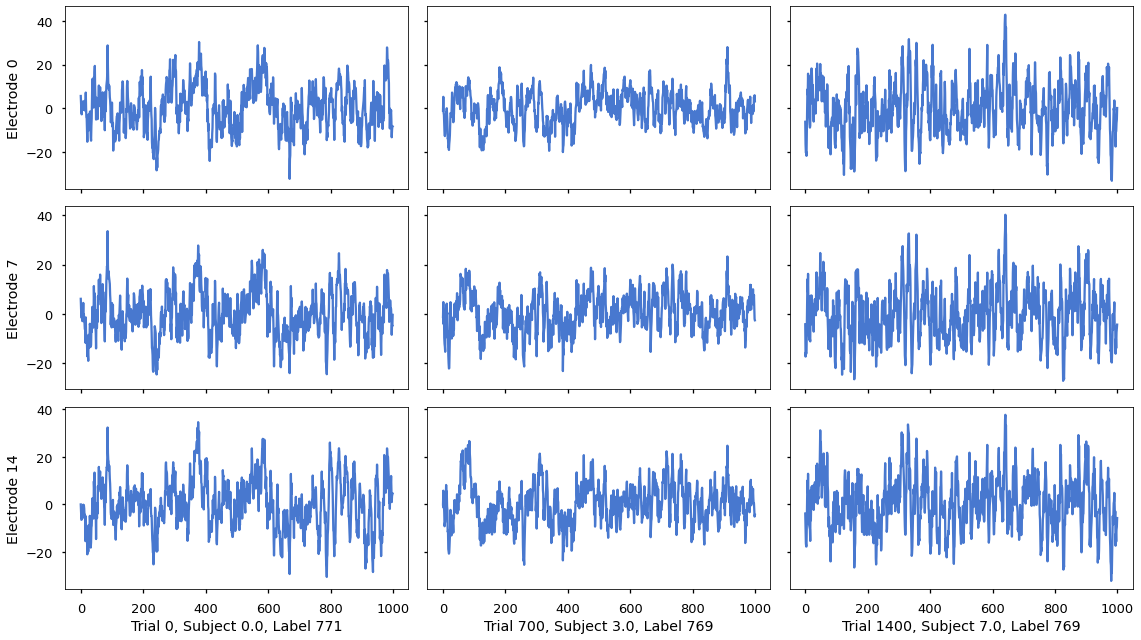

In [62]:
plt.style.use(['seaborn-muted', 'seaborn-talk'])
plt.rcParams['figure.figsize'] = (16,9)

num_channels = 3
num_trials = 3
fig, ax = plt.subplots(num_channels, num_trials, sharex='col', sharey='row')
for i in range(num_trials):
  for j in range(num_channels):
    ax[j,i].plot(X_train_valid[i*700,j*7,:].T)
    if j == len(ax) - 1:
      ax[j,i].set_xlabel(f'Trial {i*700}, Subject {person_train_valid[i*700,0]}, Label {y_train_valid[i*700]}')
    if i == 0:
      ax[j,i].set_ylabel(f'Electrode {j*7}')
plt.tight_layout()

The plots show that the waveforms for each trial across electrodes/channels are very similar to each other. This could be some sort of common mode noise across all electrodes.

## Data Pre-processing
We should consider pre-processing the data as described on Schirrmeister et al. 

* What kind of pre-processing should we do? This might become more apparent as we begin to train models and see some results.

## Basic CNN model
Let's build a basic CNN model using keras/tensorflow implementing the architecture of the shallow CNN model described on [Schirrmeister et al](https://arxiv.org/pdf/1703.05051.pdf).

